### In this project, I want to find patterns in the school shootings in USA. I want to find the time and date pattern of the shooting crimes and criminals' information through the data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2
import seaborn as sns
import pylab
from matplotlib.mlab import griddata
import datetime
color = sns.color_palette()
#from mpl_toolkis.basemap import Basemap
from IPython.core.display import display, HTML
%matplotlib inline


In [2]:
import matplotlib as mpl
import matplotlib.pylab as pylab

In [3]:
shooting = pd.read_csv('school-shootings-data.csv')

In [4]:
shooting.head()

,uid,nces_school_id,school_name,nces_district_id,district_name,date,school_year,year,time,day_of_week,...,lat,long,staffing,low_grade,high_grade,lunch,county,state_fips,county_fips,ulocale
0,1,80480000707,Columbine High School,804800.0,Jefferson County R-1,4/20/99,1998-1999,1999,11:19 AM,Tuesday,...,39.603910,-105.075000,89.6,9,12,41.0,Jefferson County,8,8059,21.0
1,2,2.20054E+11,Scotlandville Middle School,2200540.0,East Baton Rouge Parish School Board,4/22/99,1998-1999,1999,12:30 PM,Thursday,...,30.529958,-91.169966,39.0,6,8,495.0,East Baton Rouge Parish,22,22033,12.0
2,3,1.30441E+11,Heritage High School,1304410.0,Rockdale County,5/20/99,1998-1999,1999,8:03 AM,Thursday,...,33.626922,-84.047960,84.0,9,12,125.0,Rockdale County,13,13247,21.0
3,4,4.21899E+11,John Bartram High School,4218990.0,Philadelphia City SD,10/4/99,1999-2000,1999,10:00 AM,Monday,...,39.921509,-75.234108,41.0,9,12,2007.0,Philadelphia County,42,42101,11.0
4,5,2.50279E+11,Dorchester High School,2502790.0,Boston,11/3/99,1999-2000,1999,7:40 AM,Wednesday,...,42.285268,-71.075901,NaN,9,12,543.0,Suffolk County,25,25025,11.0


In [5]:
def missing_count(data):
    missing = {}
    for col in data.columns:
        missing[col] = len(data[data[col].isnull()])
    return missing

### I want to find the missing values in this dataset. There are many missing values in some categories and fewer in other categories.

In [6]:
missing_count(shooting)

{'age_shooter1': 40,
 'age_shooter2': 212,
 'american_indian_alaska_native': 5,
 'asian': 5,
 'black': 5,
 'casualties': 0,
 'city': 0,
 'county': 0,
 'county_fips': 0,
 'date': 0,
 'day_of_week': 0,
 'deceased_notes1': 186,
 'deceased_notes2': 216,
 'district_name': 11,
 'enrollment': 0,
 'gender_shooter1': 14,
 'gender_shooter2': 212,
 'hawaiian_native_pacific_islander': 120,
 'high_grade': 2,
 'hispanic': 5,
 'injured': 0,
 'killed': 0,
 'lat': 1,
 'long': 1,
 'low_grade': 2,
 'lunch': 25,
 'nces_district_id': 11,
 'nces_school_id': 3,
 'race_ethnicity_shooter1': 115,
 'race_ethnicity_shooter2': 214,
 'resource_officer': 0,
 'school_name': 0,
 'school_type': 0,
 'school_year': 0,
 'shooter_deceased1': 1,
 'shooter_deceased2': 213,
 'shooter_relationship1': 44,
 'shooter_relationship2': 213,
 'shooting_type': 1,
 'staffing': 18,
 'state': 0,
 'state_fips': 0,
 'time': 11,
 'two_or_more': 120,
 'uid': 0,
 'ulocale': 1,
 'weapon': 34,
 'weapon_source': 130,
 'white': 5,
 'year': 0}

In [7]:
shooting.shape

(217, 50)

### I fill the null values of shooter's gender to be male.

In [8]:
shooting['gender_shooter1'].fillna('m', inplace = True)

### I extract time information from the data.

In [9]:
shooting['time'][0].split(' ')

['11:19', 'AM']

In [10]:
shooting['time'].head()

0    11:19 AM
1    12:30 PM
2     8:03 AM
3    10:00 AM
4     7:40 AM
Name: time, dtype: object

In [11]:
shooting_time = shooting.dropna(subset=['time'])  # we omit 11 cases for time

In [12]:
shooting_hour = []
shooting_period = []
for time in shooting_time['time']:
    if 'AM' in time :
       shooting_hour.append(int(time.split(' ')[0].split(':')[0]))
       shooting_period.append('AM')
    elif int(time.split(' ')[0].split(':')[0]) == 12:
       shooting_hour.append(int(time.split(' ')[0].split(':')[0]))
       shooting_period.append('PM')
    else:
       shooting_hour.append(12+ int(time.split(' ')[0].split(':')[0]))
       shooting_period.append('PM')
        

In [13]:
shooting_time['Hour'] = shooting_hour
shooting_time['Period'] = shooting_period

/Users/apple/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/apple/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [14]:
shooting['day_of_week'].value_counts()

Tuesday      52
Wednesday    50
Monday       45
Friday       37
Thursday     33
Name: day_of_week, dtype: int64

Tuesday and Wednesday have the most number of shootings.

In [15]:
shooting_time['Period'].value_counts()

AM    110
PM     96
Name: Period, dtype: int64

Shootings are more likely to happen in the morning than in the afternoon.

In [16]:
shooting_time['Hour'].value_counts()

12    31
8     27
14    26
7     25
10    24
13    21
11    17
9     17
15    15
16     3
Name: Hour, dtype: int64

Shooting is most likely to happend around noon.

In [17]:
shooting['Month'] = shooting.date.apply(lambda x: int(x.split('/')[0]))

In [18]:
shooting['Month'].value_counts()

1     37
2     34
10    27
9     26
4     20
3     20
11    15
5     12
12    10
8      9
6      5
7      2
Name: Month, dtype: int64

During the beginning of the year shooting is mostly likely to happen, following by the fall of the year.

In [19]:
#shooting['killed'].value_counts()

In [20]:
#shooting['injured'].value_counts()

In [21]:
shooting['casualties'].value_counts()

1     107
0      54
2      29
3       8
4       5
5       4
34      2
10      2
6       2
28      1
18      1
15      1
14      1
Name: casualties, dtype: int64

In [22]:
shooting['year'].value_counts()

2014    16
2006    15
2017    14
2018    13
2005    13
2016    13
2013    13
2001    13
2000    12
2003    12
2012    11
2007    10
2004     9
2008     9
2009     9
2010     9
2011     7
2015     7
1999     7
2002     5
Name: year, dtype: int64

In [23]:
shooting['gender_shooter1'].value_counts()

m    207
f     10
Name: gender_shooter1, dtype: int64

Most shooters are men.

In [24]:
shooting['shooting_type'].value_counts()

targeted                       130
indiscriminate                  42
accidental                      26
targeted and indiscriminate      5
public suicide                   4
unclear                          4
hostage suicide                  2
accidental or targeted           2
public suicide (attempted)       1
Name: shooting_type, dtype: int64

targeted shootings are most common.

In [25]:
shooting_weapon = shooting.dropna(subset = ['weapon'])  # we omit 34 cases for weapon

In [26]:
shooting['weapon'][0]

'12-gauge Savage-Springfield 67H pump-action shotgun, Hi-Point 995 Carbine 9mm carbine, 9\xcc\xd119mm Intratec TEC-9 semiautomatic handgun, 12-gauge Stevens 311D double-barreled sawed-off shotgun'

In [27]:
weapon_type = []
for weapon in shooting_weapon['weapon']:
    if 'shotgun' in weapon:
        weapon_type.append('shotgun')
    elif 'rifle' in weapon:
        weapon_type.append('rifle')
    elif 'shotgun' in weapon:
        weapon_type.append('shotgun')
    elif 'revolver'in weapon:
        weapon_type.append('revolver')
    else:
        weapon_type.append('handgun')
shooting_weapon['weapon type'] = weapon_type

/Users/apple/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


In [28]:
shooting_weapon['weapon type'].value_counts()

handgun     124
revolver     22
rifle        20
shotgun      17
Name: weapon type, dtype: int64

handguns are most common as weapon.

In [29]:
shooting['state'].value_counts()

California              27
Florida                 17
Texas                   13
North Carolina          11
Pennsylvania            10
Illinois                10
Louisiana               10
Ohio                    10
Georgia                  9
Tennessee                8
Michigan                 8
Alabama                  7
Washington               7
Maryland                 5
Colorado                 5
Mississippi              4
Oregon                   4
Missouri                 4
Virginia                 4
Kentucky                 3
New York                 3
Wisconsin                3
Indiana                  3
Oklahoma                 3
South Carolina           3
New Mexico               3
Minnesota                3
Arizona                  2
District of Columbia     2
Connecticut              2
Utah                     2
Nevada                   2
South Dakota             1
Nebraska                 1
New Jersey               1
Arkansas                 1
New Hampshire            1
R

In [30]:
shooting['county'].value_counts()

Los Angeles County       7
Jefferson County         6
Cook County              6
Orange County            5
Philadelphia County      5
Orleans Parish           4
Hamilton County          3
San Diego County         3
Duval County             3
Mobile County            3
Fulton County            3
Ventura County           2
Merced County            2
Dallas County            2
Wayne County             2
Lake County              2
Fairfield County         2
Cameron County           2
Mecklenburg County       2
Suffolk County           2
Cumberland County        2
Jackson County           2
Harris County            2
Miami-Dade County        2
Lancaster County         2
Douglas County           2
Alameda County           2
Ellis County             2
San Bernardino County    2
Spokane County           2
                        ..
Caddo Parish             1
Henrico County           1
Palm Beach County        1
Stanly County            1
Providence County        1
DeSoto County            1
M

In [31]:
shooting_age = shooting.dropna(subset = ['age_shooter1'])  ###There are 40 missing values.

In [32]:
shooting_age['age_shooter1'] = shooting_age.age_shooter1.apply(lambda x: int(x))

/Users/apple/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [33]:
shooting_age['age_shooter1'].value_counts()

15    32
16    25
17    25
14    24
18    11
19     9
13     7
28     5
12     4
20     3
21     3
53     3
23     2
11     2
6      2
44     2
41     2
32     2
47     1
7      1
9      1
50     1
49     1
48     1
30     1
45     1
42     1
39     1
38     1
33     1
22     1
56     1
Name: age_shooter1, dtype: int64

In [34]:
shooting_age_cat = []
for age in shooting_age['age_shooter1']:
    if age > 14 and age < 19:
        shooting_age_cat.append('high school')
    elif age <= 14:
        shooting_age_cat.append('young child')
    elif age >= 19 and age < 31:
        shooting_age_cat.append('young adult')
    else:
        shooting_age_cat.append('mature adult')
shooting_age['age category']= shooting_age_cat


/Users/apple/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [35]:
shooting_age['age category'].value_counts()

high school     93
young child     41
young adult     24
mature adult    19
Name: age category, dtype: int64

Most shooters are high school students.

### Now let's plot to summarize the above information.

In [36]:
mpl.style.use('ggplot')
sns.set_style('white')
#pylab.rcParams('figure.figsize') = 8,6

In [37]:
def plot_distribution(df, var, target, **kwargs):
    row = kwargs.get('row', None)
    col = kwargs.get('col', None)
    facet = sns.FacetGrid(df, hue = target, aspect = 4, row = row, col = col)
    facet.map(sns.kdeplot, var, shade = True)
    facet.set(xlim = (0, df[var].max()))
    facet.add_legend()

## The following is the casualties distribution in 12 months.

/Users/apple/anaconda/lib/python2.7/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/apple/anaconda/lib/python2.7/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


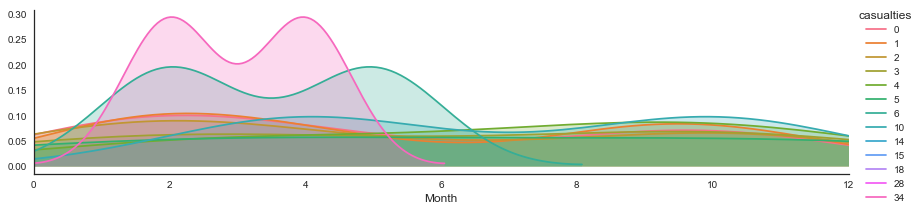

In [38]:
plot_distribution(shooting, var = 'Month', target = 'casualties')

### The following is the casualty distribution in 24 hours.

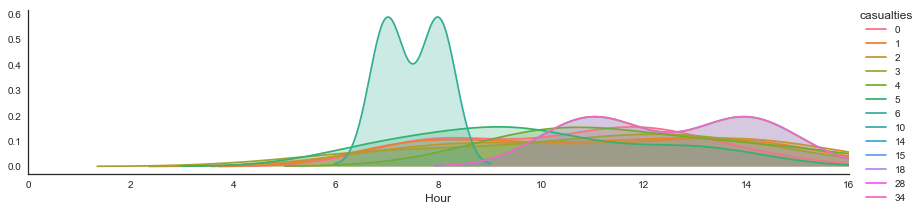

In [39]:
plot_distribution(shooting_time, var = 'Hour', target = 'casualties')

In [40]:
def plot_categories(df, cat, target, **kwargs):
    row = kwargs.get('row', None)
    col = kwargs.get('col', None)
    facet = sns.FacetGrid(df, row= row, col = col)
    facet.map(sns.barplot, cat, target)
    facet.add_legend

### The following two graphs are casualties in different weapon types and by different genders of criminals.

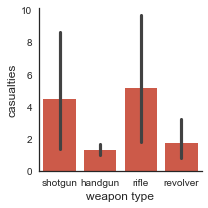

In [41]:
plot_categories(shooting_weapon, cat = 'weapon type', target = 'casualties')

On average, rifle results in more casualties than other types of weapons.

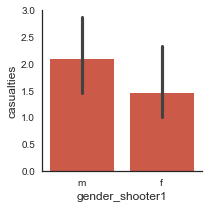

In [42]:
plot_categories(shooting_weapon, cat = 'gender_shooter1', target = 'casualties')

In [43]:
shooting_gender = pd.DataFrame({'Counts': shooting['gender_shooter1'].value_counts()})

Text(0.5,1,u'Number of shootings by different ages of criminals')

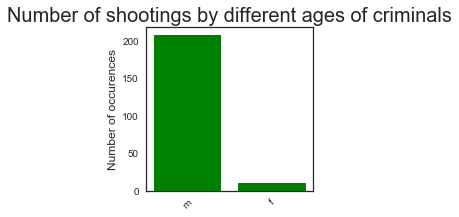

In [44]:
plt.figure(figsize=(3,3))
plt.bar(np.arange(2), shooting_gender.Counts, color = 'green')
plt.xticks(np.arange(2), shooting_gender.index, rotation =45)
plt.ylabel("Number of occurences")
plt.title("Number of shootings by different ages of criminals", fontsize = 20)

Even though males are responsible for most shootings, on average the casuality caused by men are not much higher than female, differ by around 0.5 units.

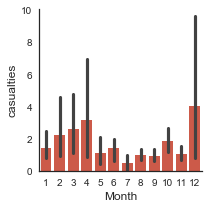

In [45]:
plot_categories(shooting, cat = 'Month', target = 'casualties')

December has most casualties on average.

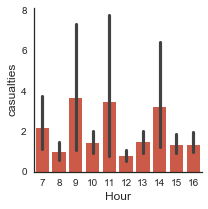

In [46]:
plot_categories(shooting_time, cat = 'Hour', target = 'casualties')

9 and 11 in the morning, 2 in the afternoon have most casualties on average.

### Now I care about the total counts of shootings in different categories and states.

In [47]:
top10_state = pd.DataFrame({'Counts': shooting['state'].value_counts()[:10]})

Text(0.5,1,u'Top 10 states with highest number of school shootings')

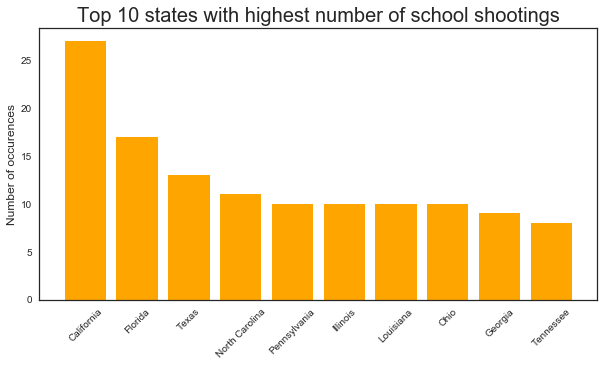

In [48]:
plt.figure(figsize=(10,5))
plt.bar(np.arange(10), top10_state.Counts, color = 'orange')
plt.xticks(np.arange(10), top10_state.index, rotation =45)
plt.ylabel("Number of occurences")
plt.title("Top 10 states with highest number of school shootings", fontsize = 20)

In [49]:
features = ['casualties','state']

In [50]:
mean_casualty_by_state = shooting[features].groupby('state')['casualties'].mean()

In [51]:
mean_casualty_by_state.index

Index([u'Alabama', u'Arizona', u'Arkansas', u'California', u'Colorado',
       u'Connecticut', u'District of Columbia', u'Florida', u'Georgia',
       u'Hawaii', u'Illinois', u'Indiana', u'Kentucky', u'Louisiana',
       u'Maryland', u'Massachusetts', u'Michigan', u'Minnesota',
       u'Mississippi', u'Missouri', u'Montana', u'Nebraska', u'Nevada',
       u'New Hampshire', u'New Jersey', u'New Mexico', u'New York',
       u'North Carolina', u'Ohio', u'Oklahoma', u'Oregon', u'Pennsylvania',
       u'Pennsylvania ', u'Rhode Island', u'South Carolina', u'South Dakota',
       u'Tennessee', u'Texas', u'Utah', u'Virginia', u'Washington',
       u'Wisconsin'],
      dtype='object', name=u'state')

In [52]:
mean_casualty_by_state.values

array([  0.57142857,   1.        ,   1.        ,   2.2962963 ,
         7.6       ,  14.        ,   1.5       ,   2.82352941,
         1.11111111,   1.        ,   0.9       ,   0.66666667,
         6.66666667,   0.9       ,   1.4       ,   1.        ,
         1.        ,   5.33333333,   1.        ,   0.75      ,
         0.        ,   3.        ,   2.5       ,   0.        ,
         1.        ,   2.        ,   1.33333333,   0.81818182,
         1.9       ,   2.        ,   3.25      ,   1.9       ,
         1.        ,   0.        ,   1.66666667,   1.        ,
         1.25      ,   0.84615385,   0.5       ,   0.25      ,
         1.57142857,   0.66666667])

In [53]:
mean_casualty_by_state = pd.DataFrame({'state':mean_casualty_by_state.index,'mean casualty': mean_casualty_by_state.values})

In [54]:
mean_casualty_by_state.sort_values(by = ['mean casualty'], ascending = False, inplace = True)

Text(0.5,1,u'Top 10 states with highest average number of casualties in school shootings')

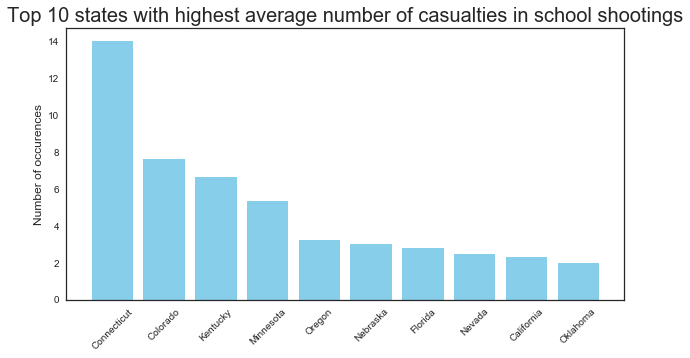

In [55]:
plt.figure(figsize=(10,5))
plt.bar(np.arange(10), mean_casualty_by_state['mean casualty'][:10], color = 'skyblue')
plt.xticks(np.arange(10),mean_casualty_by_state['state'][:10] , rotation =45)
plt.ylabel("Number of occurences")
plt.title("Top 10 states with highest average number of casualties in school shootings", fontsize = 20)

In [56]:
total_casualty_by_state = shooting[features].groupby('state')['casualties'].sum()

In [57]:
total_casualty_by_state = pd.DataFrame({'state':total_casualty_by_state.index,'total sum of casualties': total_casualty_by_state.values})

In [58]:
total_casualty_by_state.sort_values(by = ['total sum of casualties'], ascending = False, inplace = True)

Text(0.5,1,u'Top 10 states with highest total number of casualties in school shootings')

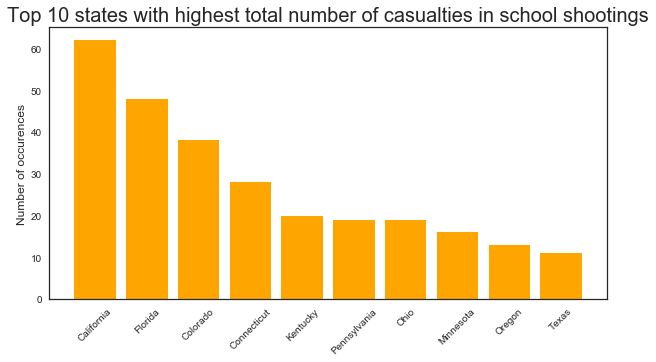

In [59]:
plt.figure(figsize=(10,5))
plt.bar(np.arange(10), total_casualty_by_state['total sum of casualties'][:10], color = 'orange')
plt.xticks(np.arange(10),total_casualty_by_state['state'][:10] , rotation =45)
plt.ylabel("Number of occurences")
plt.title("Top 10 states with highest total number of casualties in school shootings", fontsize = 20)

California has most number of shootings, followed by Floria and Texas. California also has the most number of total casualties, followed by Florida and Colorado.

In [60]:
top10_county = pd.DataFrame({'Counts': shooting['county'].value_counts()[:10]})

Text(0.5,1,u'Top 10 counties with highest number of school shootings')

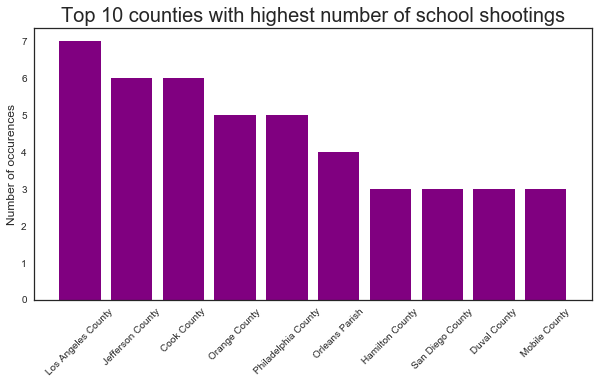

In [61]:
plt.figure(figsize=(10,5))
plt.bar(np.arange(10), top10_county.Counts, color = 'purple')
plt.xticks(np.arange(10), top10_county.index, rotation =45)
plt.ylabel("Number of occurences")
plt.title("Top 10 counties with highest number of school shootings", fontsize = 20)

 LA has the most number of shootings, followed by Jefferson County and Cook County.

In [62]:
shooting_type = pd.DataFrame({'Counts': shooting['shooting_type'].value_counts()})

Text(0.5,1,u'Number of shootings in different shooting types')

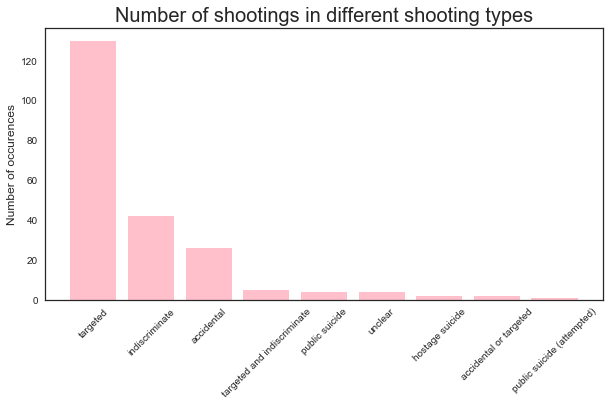

In [63]:
plt.figure(figsize=(10,5))
plt.bar(np.arange(9), shooting_type.Counts, color = 'pink')
plt.xticks(np.arange(9), shooting_type.index, rotation =45)
plt.ylabel("Number of occurences")
plt.title("Number of shootings in different shooting types", fontsize = 20)

targeted shooting is the most common.

In [64]:
shooting_age_cate = pd.DataFrame({'Counts': shooting_age['age category'].value_counts()})

Text(0.5,1,u'Number of shootings by different ages of criminals')

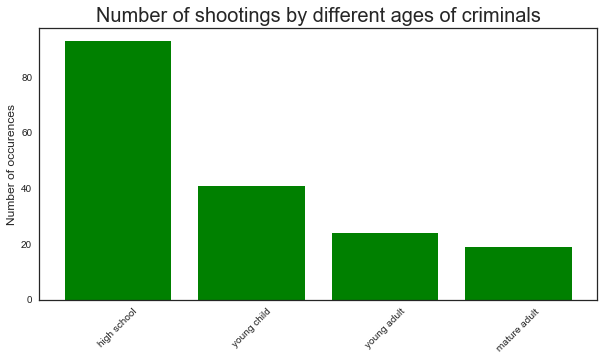

In [65]:
plt.figure(figsize=(10,5))
plt.bar(np.arange(4), shooting_age_cate.Counts, color = 'green')
plt.xticks(np.arange(4), shooting_age_cate.index, rotation =45)
plt.ylabel("Number of occurences")
plt.title("Number of shootings by different ages of criminals", fontsize = 20)

In [66]:
shooting_gender = pd.DataFrame({'Counts': shooting['gender_shooter1'].value_counts()})

high schoolers are the primary criminals in the school shooting.

### I want to study the time patterns of the shooting.

In [67]:
shooting['year'] = shooting['year'].astype('int')

Text(0.5,1,u'School shooting by year')

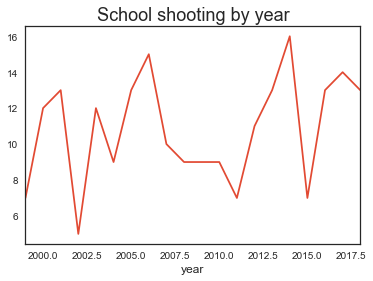

In [68]:
shooting.groupby('year').size().plot()
plt.title('School shooting by year', fontsize = 18)

In [69]:
shooting['date'] = shooting.date.apply(lambda x: pd.to_datetime(x))

In [70]:
shooting['DayOfWeek'] = shooting['date'].dt.dayofweek.astype('category')

In [71]:
shooting['DayOfWeek'].value_counts()

1    52
2    50
0    45
4    37
3    33
Name: DayOfWeek, dtype: int64

In [72]:
shooting['day_of_week'].value_counts()

Tuesday      52
Wednesday    50
Monday       45
Friday       37
Thursday     33
Name: day_of_week, dtype: int64

In [73]:
day_names = {0: 'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday',
             4:'Friday', 5:'Saturday', 6:'Sunday'}

In [74]:
shooting['FullDayOfWeek'] = shooting['DayOfWeek'].apply(lambda x: day_names[x])

Text(0.5,1,u'School shooting by day of week')

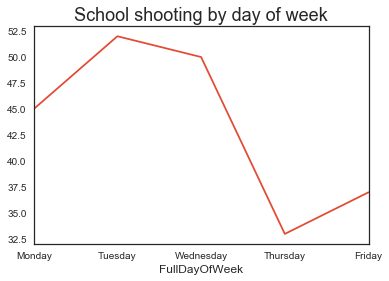

In [75]:
shooting.groupby('FullDayOfWeek').size().plot()
plt.title('School shooting by day of week', fontsize = 18)

Tuesday and Wednesday are most common for shooting to happen.

Text(0.5,1,u'School shooting by hour')

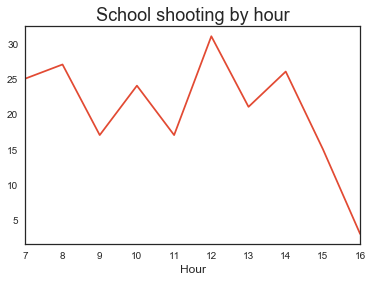

In [76]:
shooting_time.groupby('Hour').size().plot()
plt.title('School shooting by hour', fontsize = 18)

Noon is the most likly hour for shooting to happen.

I also want to see some correlation of student information.

In [77]:
def plot_correlation_map(data):
    corr = data.corr()
    _, ax =plt.subplots(figsize = (12, 10))
    cmap = sns.diverging_palette(220, 10, as_cmap = True)
    _ = sns.heatmap(
         corr,
         cmap = cmap,
         square = True,
         cbar_kws = {'shrink': 0.9},
         ax = ax,
         annot = True,
         annot_kws = {'fontsize': 12})

In [78]:
shooting_subset = shooting.copy()

In [79]:
features = ['age_shooter1','american_indian_alaska_native', 'asian', 'black',
           'casualties','enrollment','high_grade','hispanic','injured','killed','low_grade','lunch',
           'staffing','white']

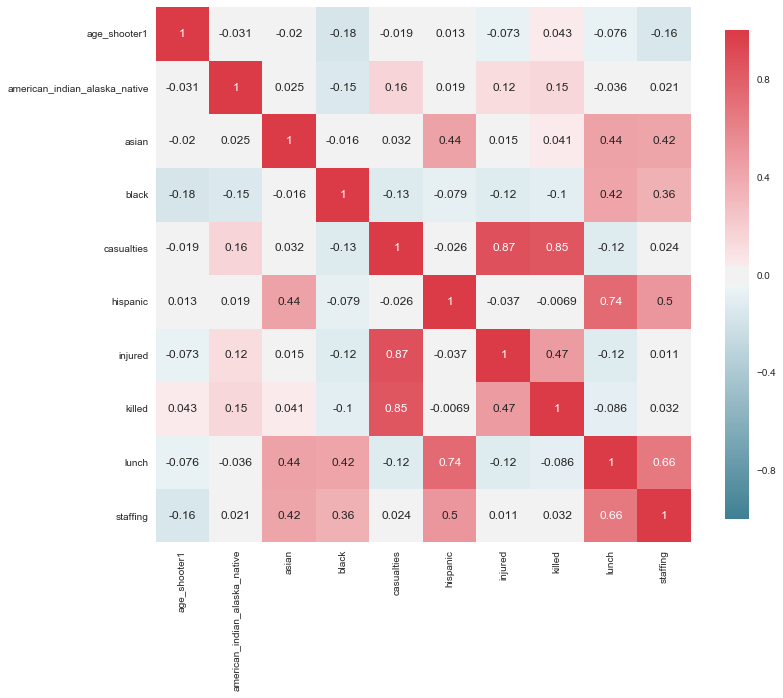

In [80]:
plot_correlation_map(shooting_subset[features])

### I want to show the crime locations over USA by the following plots.

/Users/apple/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:973: RuntimeWarning: invalid value encountered in greater_equal
  not_smaller_than_edge = (sample[:, i] >= edges[i][-1])


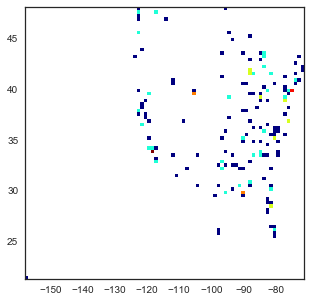

In [81]:
from matplotlib.colors import LogNorm
fig = plt.figure(figsize = (5,5))
ax2 = fig.add_subplot(1,1,1)
ax2.hist2d(shooting['long'], shooting['lat'], bins =80, norm = LogNorm(),cmap = plt.cm.jet,\
          range = [[-157.837200, -71.075901], [21.310400, 48.095820]])
plt.show()

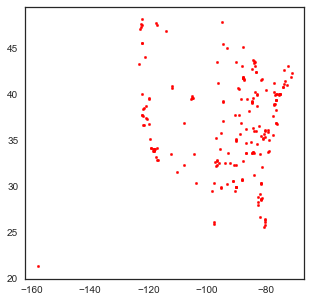

In [82]:
fig = plt.figure(figsize = (5,5))
ax1 = fig.add_subplot(1,1,1)
ax1.scatter(shooting['long'], shooting['lat'], s=5, color ='red')
plt.show()

I want to further check the dependence between features in the school shooting data.

In [83]:
le = LabelEncoder()

In [84]:
shooting_weapon['weapon type encoded'] = le.fit_transform(shooting_weapon['weapon type'])

/Users/apple/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [85]:
feature_casualties = ['casualties','killed','injured']

In [86]:
chi2_stat, p_value = chi2(shooting_weapon.loc[:,feature_casualties].values, shooting_weapon['weapon type encoded'].values)
pd.DataFrame({'chi2_stats': chi2_stat, 'p_values': p_value}, index = feature_casualties).sort_values(by = 'p_values')

,chi2_stats,p_values
casualties,179.940741,9.083706e-39
killed,133.580440,9.149617e-29
injured,72.086699,1.525260e-15


We see that casualties, killed, injured are all dependent of the weapon type, since their p-values are less than 0.05.

In [120]:
chi2_stat, p_value = chi2(shooting_time.loc[:,feature_casualties].values, shooting_time['Hour'].values)
pd.DataFrame({'chi2_stats': chi2_stat, 'p_values': p_value}, index = feature_casualties).sort_values(by = 'p_values')

,chi2_stats,p_values
casualties,113.611467,2.700322e-20
killed,83.500193,3.249841e-14
injured,56.167865,7.290603e-09


In [121]:
shooting_age['age cate encoded']=le.fit_transform(shooting_age['age category'])

/Users/apple/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [122]:
chi2_stat, p_value = chi2(shooting_age.loc[:,feature_casualties].values, shooting_age['age cate encoded'].values)
pd.DataFrame({'chi2_stats': chi2_stat, 'p_values': p_value}, index = feature_casualties).sort_values(by = 'p_values')

,chi2_stats,p_values
killed,97.562521,5.194387e-21
casualties,42.494836,3.150309e-09
injured,8.033084,4.533288e-02


We see that casualties, killed, injured are all dependent of the hour of shooting and shooter's age, since their p-values are less than 0.05.

In [123]:
chi2_stat, p_value = chi2(shooting.loc[:,feature_casualties].values, shooting['year'].values)
pd.DataFrame({'chi2_stats': chi2_stat, 'p_values': p_value}, index = feature_casualties).sort_values(by = 'p_values')

,chi2_stats,p_values
casualties,239.169052,4.791291e-40
killed,171.773856,1.277052e-26
injured,167.233281,9.875313e-26


We see that casualties, killed, injured are also dependent of the year of shooting, since their p-values are less than 0.05.

In [103]:
shooting_weapon['school type encoded'] = le.fit_transform(shooting_weapon['school_type'])

/Users/apple/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [106]:
feature_school = ['school type encoded']

In [124]:
#shooting_weapon['weapon type encoded'].values

In [111]:
chi2_stat, p_value = chi2(shooting_weapon.loc[:,feature_school].values, shooting_weapon['weapon type encoded'].values)
pd.DataFrame({'chi2_stats': chi2_stat, 'p_values': p_value}, index = feature_school).sort_values(by = 'p_values')

,chi2_stats,p_values
school type encoded,0.09926,0.991926


Aparently there's no relationship between school type and weapon type.

In [117]:
feature_year = ['year']

In [118]:
chi2_stat, p_value = chi2(shooting_weapon.loc[:,feature_year].values, shooting_weapon['weapon type encoded'].values)
pd.DataFrame({'chi2_stats': chi2_stat, 'p_values': p_value}, index = feature_year).sort_values(by = 'p_values')

,chi2_stats,p_values
year,0.030599,0.998589


Aparently there's no relationship between year of shooting and weapon type.